<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-group-photo/blob/master/prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os, sys
import numpy
import cv2
import dlib
from google.colab.patches import cv2_imshow
import scipy.spatial as spatial
from scipy.spatial.distance import euclidean as euclid_distance
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

# upload pictures
!wget -q https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/pictures/group_2/index.txt -O group_2.txt
!mkdir group_2


!xargs -i -a group_2.txt wget -q https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/pictures/group_2/{} -O group_2/{}
!ls -lah group_2

path = './group_2'

files = os.listdir(path)
files = list(map(lambda f: path + '/' + f, files))
print(files)

imgs = list(map(cv2.imread, files))

# get models
!wget -q  https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/shape_predictor_68_face_landmarks.dat.bz2 -O shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
!wget -q https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/dlib_face_recognition_resnet_model_v1.dat.bz2
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2

mkdir: cannot create directory ‘group_2’: File exists
total 40M
drwxr-xr-x 2 root root 4.0K Jan  4 18:52 .
drwxr-xr-x 1 root root 4.0K Jan  4 18:52 ..
-rw-r--r-- 1 root root 3.7M Jan  4 19:16 IMG_20191112_111241.jpg
-rw-r--r-- 1 root root 3.6M Jan  4 19:16 IMG_20191112_111244.jpg
-rw-r--r-- 1 root root 4.0M Jan  4 19:16 IMG_20191112_111256.jpg
-rw-r--r-- 1 root root 3.9M Jan  4 19:16 IMG_20191112_111257.jpg
-rw-r--r-- 1 root root 3.8M Jan  4 19:16 IMG_20191112_111300.jpg
-rw-r--r-- 1 root root 4.2M Jan  4 19:16 IMG_20191112_111301.jpg
-rw-r--r-- 1 root root 3.8M Jan  4 19:16 IMG_20191112_111313.jpg
-rw-r--r-- 1 root root 3.3M Jan  4 19:16 IMG_20191112_111315.jpg
-rw-r--r-- 1 root root 3.4M Jan  4 19:16 IMG_20191112_111327.jpg
-rw-r--r-- 1 root root 3.5M Jan  4 19:16 IMG_20191112_111330.jpg
-rw-r--r-- 1 root root 3.3M Jan  4 19:16 IMG_20191112_111332.jpg
['./group_2/IMG_20191112_111332.jpg', './group_2/IMG_20191112_111241.jpg', './group_2/IMG_20191112_111315.jpg', './group_2/IMG_2019111

11


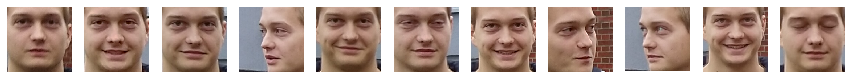

---------
7


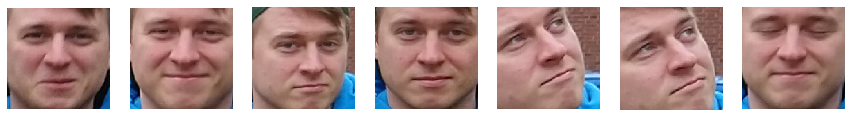

---------
10


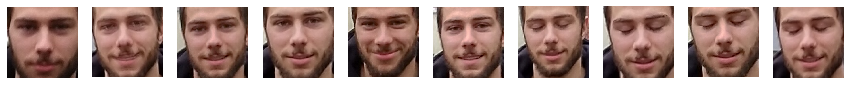

---------
11


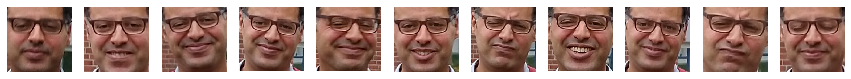

---------


In [31]:
class Person:
  def __init__(self, id):
    self.id = id
    self.faces = []

  def faceVectorMatches(self, vector):
    return euclid_distance(self.id,vector) < 0.6

class Face:
  def __init__(self, picture_data, picture_index, landmarks):
    self.picture_data = picture_data
    self.picture_index = picture_index
    self.landmarks = landmarks
    self.score_orientation = 0 # TODO: define metric for orientation
    self.score_eyes = None
    self.score_mouth = None
    self.score_all = None

  def show(self):
    cv2_imshow(self.picture_data)

# sets and return score_all, parameters are for weighting the scores
def scoreAll(self, w1 = 3, w2 = 2, w3 = 1):
  self.score_all = self.score_orientation * w1 + self.score_eyes * w2 + self.score_mouth * w3
  return self.score_all

# return the face given a picture and the coords of the face
def extractFace(pic, coords):
  return pic[coords.top():coords.bottom(), coords.left():coords.right()]

# filenames
landmarks_filename = "shape_predictor_68_face_landmarks.dat"
facerecognition_filename = "dlib_face_recognition_resnet_model_v1.dat"

# TODO: fill pictures with filenames
# upload pictures 
cv_pictures = imgs
dlib_pictures = [cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB) for cv_img in cv_pictures]

# init face detection and landmarks
face_detector = dlib.get_frontal_face_detector()
face_landmarks = dlib.shape_predictor(landmarks_filename)
face_recognition = dlib.face_recognition_model_v1(facerecognition_filename)

# list of every unique person
persons = []

# iterate each picture and search for faces
for pic_idx, picture in enumerate(dlib_pictures):
  # detect faces in the image
  faces = face_detector(picture, 0)

  # TODO: evlt Schleife angucken, was genau ist d?
  # d is the rectangle of the face
  # get landmarks of each face
  # get id for each face
  for k,d in enumerate(faces):
    landmarks = face_landmarks(picture,d)
    face_id = face_recognition.compute_face_descriptor(picture,landmarks)

    # check if person is already in persons list
    person = next((person for person in persons if person.faceVectorMatches(face_id)), None)
    if person is None:
      person = Person(face_id)
      persons.append(person)

    face = Face(extractFace(picture, d), pic_idx, landmarks)
    person.faces.append(face)


for person in persons:
  print(len(person.faces))

  fig, ax = plt.subplots(nrows=1,ncols=len(person.faces),figsize=(15,15))
  for i,a in enumerate(ax):
    a.imshow(person.faces[i].picture_data)
    a.axis("off")

  plt.show()
  print("---------")


